# Алгоритъм за проследяване на лъчи

## Въведение

Моделирането на светлината като множество от лъчи е широко използвано в компютърните графики и дизайна на лещи. Съответното курсовото задание демострира опростени двумерни алгоритми за проследяване на лъчи, имплементирани с python.

## Схематично изложение на алгоритъм за проследяване на лъчи

При симулация за проследяване на лъчи, светлината се представя като няколко светлинни лъча, тя също може да се опише и като частици (фотони), а лъчите като траекторията на движението им. Когато светлината срещне друга среда, част от нея се отразява, друга се пречупва и част от енергията ѝ се абсорбира. Всеки от разделените лъчи продължава пътя си, докато не срещне друга среда. Обобщено, алгоритъм за проследяване на лъчи се състои от следните стъпки:

-   Намиране на пресечната точка между лъча и оптичната повърхност

-   Изчисляване на новата траектория на лъча след преминаване в оптичната среда

Следващите параграфи ще покажат как можем да постигнем това.

## Намиране на пресечната точка между лъча и обекта


Чрез параметризиране на лъч и обект, можем да намерим пресечните точки между тях. Изразяваме вектора на светлинния лъч като $\mathbf{r}(t)=(x(t),y(t),z(t))$ и уравнението на повърхнината като $S(x,y,z)=0$. Намиране на $t$, при което $S(x(t),y(t),z(t))=0$ и $x(t),y(t)$ и $z(t)$ са в грананиците. Нека предположим, че решението е $t'$, $x(t'),y(t')$ и $z(t')$ са пресечните точки между лъча и повърхността.

Началните точки на лъчите $x_0$, $y_0$, $z_0$ и началните ъгли $\theta$ и $\phi$ се задават от потребителя като начални условия на лъчите. Тези параметри са констатни, докато лъчът не бъде пречупен или отразен. Можем да мислим за $t$ като “време на полет” на лъча.
За двумерна симулация задаваме $\phi=0$ и работим на $y-z$ равнина.
<img src="https://kanhua.github.io/images/ray_tracing_illustration.svg" alt="Drawing" style="width: 400px;"/>

## Изчисляване на новата посока на движение на лъча

### Изчисляване на нормалния вектор

Нормалният вектор е тангенциален на повърхнината $(x,y(x))$. Тангенциалният вектор на тази повърхнина в $(x,y)$ е първата производна: $d\mathbf{s}=(dx,dy)=dx(1,\frac{dy}{dx})=dx(1,y'(x))$. В случая на 2D, нормалния вектор е $\mathbf{n}=(dy,-dx)$.

### Обща форма на закона на Снелиус

Известно е, че можем да изчислим лъчa на пречупване, използвайки закона на Снелиус:

\begin{equation}
n_r'\sin\theta'=n_r \sin \theta ~~~~~(1)
\end{equation}
 

Уравнението описва връзката между ъгъла на навлизане и ъгъла на пречупване.
За да можем да работим с лъчеви вектори на навлизане, върху произволна повърхност в пространство с повече измерения, трябва да дадем по-общ израз на закона на Снелиус:
$$
n_r'\mathbf{r}'\times \mathbf{n}=n_r \mathbf{r}\times \mathbf{n}
$$ 
където $\mathbf{n}$ е нормалния вектор на повърхноста в точката на пречупване, $n_r$ и $n_r'$ са показателите на пречупване на средите, $\mathbf{r}$ и $\mathbf{r'}$ са лъчевите вектори, преди и след пречупването. $\times$ е векторно умножение. Забележете, че всички вектори показани по-горе са нормирани единични вектори. Горното уравнение може да бъде пренаредено, за да добие по-добър вид за пресмятане на пречупващия вектор $\mathbf{r}'$:
    
$$
n_r'\mathbf{r}'=n_r\mathbf{r}+(n'\mathbf{r}'\cdot\mathbf{n}-n\mathbf{r}\cdot\mathbf{n})\mathbf{n}~~~~(2)
$$
и $\mathbf{r}'\cdot\mathbf{n}$ отдясната страна на може да бъде пресметнато, използвайки Уравнение (1)
$$
\begin{split}
    \mathbf{r}'\cdot\mathbf{n}&=\cos\theta' \
                              &=\sqrt{1-\sin^2\theta'} \
                              &=\sqrt{1-\left(\frac{n_r}{n_r'}\sin\theta\right)^2}
\end{split}
$$ 
Заместваме известните $\mathbf{r}$, $\mathbf{n}$, $n_r$, $n_r'$ и $\mathbf{r}'\cdot\mathbf{n}$ в Уравнение (2) и можем да получим пречупения вектор $\mathbf{r'}$.


### References

[1] Roland Winston, Juan C. Minano and Pablo Benitez, Nonimaging Optics. Academic Press, 2005.

# Проследяване на лъчи в действие

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Асферични лещи
В случая ще използваме [асферични лещи](https://en.wikipedia.org/wiki/Aspheric_lens) като пример, но алгоритъмът би следвало да работи при всякакъв вид повърхнини.

In [2]:
def spherical_lens(y,R,x0,k=0,A=0,B=0):
    c=1/R
    z=c*np.power(y,2)/(1+np.sqrt(1-(1+k)*np.power(c*y,2)))+x0+A*np.power(y,4)+B*np.power(y,6)
    return z

In [3]:
rs=np.linspace(-10,10,30)
R=15

### Визуализиране на асферични повърхности
Забележете, че конвенцията за уравнението на лещата е **z->дясно, y->нагоре, and x->навътре**

In [4]:
z1=spherical_lens(rs,R,5)
z2=spherical_lens(rs,R,5,k=-0.669032,A=0.22e-5,B=0.15e-8)

Text(0, 0.5, 'y')

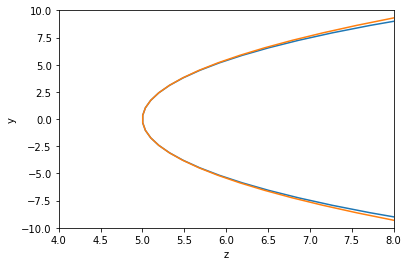

In [5]:
plt.plot(z1,rs)
plt.plot(z2,rs)
plt.ylim([-10,10])
plt.xlim([4,8])
plt.xlabel("z")
plt.ylabel("y")

### Получаване на математически изрази за параметризирано уравнение на леща и техните първи производни
Използваме формата
$$
f(z,y)=z(y)-z
$$
, където
$$
z(y)=A y^{4} + B y^{6} + \frac{c y^{2}}{\sqrt{- c^{2} y^{2} \left(k + 1\right) + 1} + 1} +zl
$$
$zl$ е координатата z на леща, когато y=0

In [6]:
from sympy import sin,cos,sqrt,latex,symbols,diff,ccode

In [7]:
z,y,c,k,zl,A,B,R_c=symbols('z y c k zl A B R_c')

Израз на уравнението на лещата $f(y,z)$

In [8]:
spherical_expr=c*y**2/(1+sqrt(1-(1+k)*(c*y)**2))-z+A*y**4+B*y**6+zl

In [9]:
spherical_expr

A*y**4 + B*y**6 + c*y**2/(sqrt(-c**2*y**2*(k + 1) + 1) + 1) - z + zl

#### Пресмятане на първата производна $z(r)$

In [10]:
spherical_expr_prime=diff(spherical_expr,y)
spherical_expr_prime

4*A*y**3 + 6*B*y**5 + c**3*y**3*(k + 1)/(sqrt(-c**2*y**2*(k + 1) + 1)*(sqrt(-c**2*y**2*(k + 1) + 1) + 1)**2) + 2*c*y/(sqrt(-c**2*y**2*(k + 1) + 1) + 1)

$z'(y)$:

#### Пресмятане на праметризиращото уравнение на леща

Уравнението на повърхнината е $z=z(y)$, което може да бъде представено като $f(y,z)=z(y)-z$



The surface equation is $z=z(y)$, which can be rearranged as $f(y,z)=z(y)-z$

Заместваме праметризираните лъчеви вектори в уравнението на лещата $f(y,z)$:
$$
z(t)=z_0+\cos\theta t \\
y(t)=y_0+\cos\theta t$$

Тогава ще имаме нова параметризирана функция $g(t)=f(y(t),z(t))$.
За да пресметнем пресечната област между лъча и повърхнината, трябва да решим $g(t)=0$. За някои числени методи, като метода на Нютон-Рафсън, също така ще бъде нужна и първата производна $g'(t)$.
Ще пресметнем и тях.

In [11]:
theta,t=symbols('theta t')
z0,y0=symbols('z0 y0')

#### Параметризиране на лъчите

In [12]:
ray_z=z0+cos(theta)*t
ray_y=y0+sin(theta)*t

#### Заместваме ```y(t)``` и ```z(t)``` в уравнението на повърхнината

In [13]:
spherical_expr.subs(y,ray_y)
spherical_expr.subs(z,ray_z)
param_spherical_expr=spherical_expr.subs(z,ray_z).subs(y,ray_y)
param_spherical_expr

A*(t*sin(theta) + y0)**4 + B*(t*sin(theta) + y0)**6 + c*(t*sin(theta) + y0)**2/(sqrt(-c**2*(k + 1)*(t*sin(theta) + y0)**2 + 1) + 1) - t*cos(theta) - z0 + zl

####  Пресмятане на първа производна

In [14]:
param_spherical_expr_prime=diff(param_spherical_expr,t)
param_spherical_expr_prime

4*A*(t*sin(theta) + y0)**3*sin(theta) + 6*B*(t*sin(theta) + y0)**5*sin(theta) + c**3*(k + 1)*(t*sin(theta) + y0)**3*sin(theta)/(sqrt(-c**2*(k + 1)*(t*sin(theta) + y0)**2 + 1)*(sqrt(-c**2*(k + 1)*(t*sin(theta) + y0)**2 + 1) + 1)**2) + 2*c*(t*sin(theta) + y0)*sin(theta)/(sqrt(-c**2*(k + 1)*(t*sin(theta) + y0)**2 + 1) + 1) - cos(theta)

In [15]:
def ray_param_eq(t,c,k,x0,y0,theta):
    return c*(t*np.sin(theta) + y0)**2/(np.sqrt(-c**2*(k + 1)*(t*np.sin(theta) + y0)**2 + 1) + 1) - t*np.cos(theta) - x0

## Имплементация на проследяване на лъчи, чрез Python
Чрез уравненията от по-горе, можем да изготвим алгоритми за проследяване на лъчи.
Използваме два класа - ```Ray``` и ```AsphericSurface``` като главни структури от данни.

- ```Ray``` - обект, който съхранява вектор на лъч $z(t)=z_0+\cos\theta t$ и $y(t)=y_0+\sin\theta t$. Когато се получи пресичане между лъч и повърхнина, то стойностите на $z_0$, $y_0$ и $t$ се обновяват. 
- ```AsphericSurface``` - обект, който съхранява параметрире на повърхнината, пресмята сечението, обновява лъчевия вектор, чрез закона на Снелиус

In [16]:
from scipy.interpolate import interp1d
from matplotlib.axes import Axes
from typing import Union,Callable

import os
import math

### Имплементиране на обекта ```Ray```

In [17]:
def _init_vec(x,y):
    vec=np.empty(2)
    vec[0]=x
    vec[1]=y
    return vec

def _fast_norm(x, y):
    return math.sqrt(math.pow(x,2)+math.pow(y,2))

class Ray(object):
    """
    The ray is a set of line segments. Each segment is represented by a vector v=[z,y]
    Ray-tracing problem also requires parameterized expressions, i.e.,
    z(t)=z_0+cos(theta)*t
    y(t)=y_0+sin(theta)*t

    z_0, y_0, theta are updated after an intersection with a surface occurs.
    Lists are used to store the old values of z_0, y_0 and theta so that a figure renderer can plot all the segments


    The ray data structure is:

        |                         |                                 |
        |                         |                                 |
        |                         |                                 |
        |                         |                                 |
    starting point              surface 1                          surface 2

       t_0                      t_1=                              t_2=
                                t_end+t_0                         t_end+t_1

     self.path: [v0,theta_0]      [[v_0,theta_0],[v_1,theta_1]]   [[v_0,theta_0],[v_1,theta_1],[v_2,theta_2]]
     self.end_ts: [Inf]           [t_1,Inf]                       [t_1,t_2,Inf]
     theta_x is raw angle from surface X, x=0 is starting point.
    v_0 are the turning points of the ray vector. Every time a ray is intersected with a surface, the value of v_0 is updated
    t_end is the ending "time" t of each line segment

     Conventions of the coordinate:
     z(right), y(up), x(forward). Same as the coordinate used in ZEMAX or other optics textbook


    """

    def __init__(self, z_0, y_0, theta, wavelength=600):
        """
        Initialize a beam

        :param z_0: starting z position
        :param y_0: starting y position
        :param theta: traveling angle (theta)
        :param wavelength: the wavelength of a ray in nanometer (not used in this implementation yet)
        """
        self.z_0 = z_0
        self.y_0 = y_0
        self.theta = theta
        self.dt = 0
        self.v_0 = _init_vec(self.z_0, self.y_0)  # vector that stores the initial point of the ray
        self.paths = [[np.copy(self.v_0), np.copy(self.theta)]]
        self.end_ts = [float('Inf')]
        self.k = _init_vec(np.cos(self.theta), np.sin(self.theta))
        self.intensity = 1
        self.wavelength = wavelength

    def update_after_intersect(self, t_end, new_theta, end_beam=False):
        """
        Update the state of a ray, including:
        - a new starting point: [z_0,y_0]
        - angle of directional cosine: theta

        :param t_end:
        :param new_theta: new traveling angle theta (radians)
        :param attenu_coef: attenuation coefficient, assigned by the Surface object
        :param end_beam: True if the ray will be stopped at this surface
        :return: None
        """

        self.v_0 += self.k * t_end

        self.z_0 = self.v_0[0]
        self.y_0 = self.v_0[1]

        self.update_theta(new_theta)
        next_t = t_end + self.dt
        self.dt = next_t
        self.end_ts[-1] = next_t

        self.paths.append([np.copy(self.v_0), np.copy(self.theta)])

        if not end_beam:
            self.end_ts.append(float('Inf'))

    def get_zy(self, delta_t):
        """
        Get z and y positions from parameter t

        :param delta_t:
        :return: np.array [z,y]
        """
        vv = self.v_0 + self.k * delta_t

        return vv[0], vv[1]

    def estimate_t(self, zp:float):
        """
        Calculate t from a given z-position zp

        :param zp: a value of z
        :return: estimated t
        """

        t = (zp - self.v_0[0]) / self.k[0]

        return t

    def update_theta(self, new_theta):
        """
        Update the traveling angle theta

        :param new_theta: new traveling angle theta of the ray
        :return: None
        """
        self.theta = new_theta
        self.k = _init_vec(np.cos(self.theta), np.sin(self.theta))

    def render(self, ax: Axes, time_of_fights, color='C0'):
        """
        Render the ray start from the most recent reracted surface

        :param ax: Matplotlib Axes to plot on
        :param time_of_fights: the stopping time that the beam ends
        :param color: matplotlib color
        :return: None
        """
        v_e = self.v_0 + time_of_fights * self.k

        v_for_plots = np.vstack((self.v_0, v_e))
        xs = v_for_plots[:, 0]
        ys = v_for_plots[:, 1]

        ax.plot(xs, ys, color=color)

    def get_k_from_theta(self, theta):

        k = _init_vec(np.cos(theta), np.sin(theta))

        return k

    def render_all(self, ax, time_of_flights, color=None):
        """
        Plot all rays on the axes.

        :param ax: axes to be plotted on
        :param time_of_flights: end travel time of the ray
        :param color: matplotlib color, such as 'C0', 'C1' or 'blue', 'red'. Set None for automatic colors.
        :return:
        """

        prev_t = 0
        for idx in range(len(self.end_ts)):
            v_0, theta = self.paths[idx]
            end_t = self.end_ts[idx]
            k = self.get_k_from_theta(theta)

            if time_of_flights > end_t:
                v_e = v_0 + (end_t - prev_t) * k
            else:
                v_e = v_0 + (time_of_flights - prev_t) * k
            v_for_plots = np.vstack((v_0, v_e))
            xs = v_for_plots[:, 0]
            ys = v_for_plots[:, 1]
            prev_t = end_t
            if color is None:
                plot_color = 'C{}'.format(idx)
            else:
                plot_color = color
            ax.plot(xs, ys, color=plot_color, linewidth=0.5)

### Имплементиране на обекта  ```AsphericSurface```

- ```get_tangent_vec(y_p)```: пресмята тангенциалния вектор $dS$ на $y_p$
- ```get_tangent_vec(y_p)```: пресмята тангенциалния вектор $dN$ на $y_p$
- ```get_refraction()```: пресмята новия вектор на лъч, използвайки закона на Снелиус
- ```intersect()```: намира сечението между лъч и повърхнината и след това пресмята пречупването на лъча

<img src="https://kanhua.github.io/images/ray_tracing_illustration.svg" alt="Drawing" style="width: 400px;"/>

In [18]:
from scipy.optimize import newton
def surface_zr(y, c, z0, k=0, A=0, B=0):
    z = c * np.power(y, 2) / (1 + np.sqrt(1 - (1 + k) * np.power(c * y, 2))) + z0 + A * np.power(y, 4) + B * np.power(y,
                                                                                                                      6)
    return z


class AsphericSurface(object):
    def __init__(self, curvature, z_0, konic, aperture_radius=10, A=0, B=0,
                 record_rays=False, material_nr=1.0, end_beam=False):
        """
        Aspheric surface object.


        :param curvature: curvature of the lens in (mm^-1)
        :param z_0: center position of the lens on z-axis
        :param konic: conic coefficient
        :param aperture_radius: radius of the aperture
        :param A: fourth order coefficient of the lens
        :param B: sixth order coefficient of the lens
        :param record_rays: True if the surface is a detector that records the ray that hit the surface
        :param attenu_coef: attenuation coefficient  (1/mm)
        """
        self.c = curvature
        self.k = konic
        self.z_0 = z_0
        self.A = A
        self.B = B
        self.aperture_radius = aperture_radius
        self.ray_bins = []
        self.record_rays = record_rays

        # FUTURE improvement: this is temporary. Future version may have shifts in y
        self.y_min = -aperture_radius
        self.y_max = aperture_radius

        self.constant_nr = material_nr
        self.n_r = self._constant_nr

        self.end_beam = end_beam

    def _constant_nr(self, wavelength):
        """
        function of wavelength dependent refractive index n_r(labmda)

        :param wavelength: can be anything
        :return: preset refractive index
        """

        return self.constant_nr

    def get_surface_zr(self, y):
        z = surface_zr(y, self.c, self.z_0, self.k, self.A, self.B)
        return z

    def spherical_lens_prime(self, y, c, k, A, B):
        return 4 * A * y ** 3 + 6 * B * y ** 5 + c ** 3 * y ** 3 * (k + 1) / (sqrt(-c ** 2 * y ** 2 * (k + 1) + 1) * (
                sqrt(-c ** 2 * y ** 2 * (k + 1) + 1) + 1) ** 2) + 2 * c * y / (
                       sqrt(-c ** 2 * y ** 2 * (k + 1) + 1) + 1)

    def ray_param_eq(self, t, c, k, z0, y0, theta, A, B):
        """
        Parametrized ray equation

        :param t:
        :param c:
        :param k:
        :param z0: starting point x0 of the ray
        :param y0: starting point y0 of the ray
        :param theta:
        :param A: coefficients of higher order term (r**4)
        :param B: coefficients of higher order term (r**6)
        :return:
        """

        return c * (t * np.sin(theta) + y0) ** 2 / (
                np.sqrt(-c ** 2 * (k + 1) * (t * np.sin(theta) + y0) ** 2 + 1) + 1) - \
               t * np.cos(theta) - z0 + self.z_0 + A * (t * np.sin(theta) + y0) ** 4 + B * (t * np.sin(theta) + y0) ** 6

    def ray_param_eq_prime(self, t, c, k, z0, y0, theta, A, B):
        """
        First order derivative of parametrized ray equation

        :param t:
        :param c:
        :param k:
        :param z0: z0 is not used but was kept so that the parameters are the same as ray_param_eq(), for the use of newton raphson solver
        :param y0:
        :param theta:
        :param A:
        :param B:
        :return:
        """

        return 4 * A * (t * np.sin(theta) + y0) ** 3 * np.sin(theta) + 6 * B * (t * np.sin(theta) + y0) ** 5 * np.sin(
            theta) + c ** 3 * (
                       k + 1) * (t * np.sin(theta) + y0) ** 3 * np.sin(theta) / (
                       np.sqrt(-c ** 2 * (k + 1) * (t * np.sin(theta) + y0) ** 2 + 1) * (
                       np.sqrt(-c ** 2 * (k + 1) * (t * np.sin(theta) + y0) ** 2 + 1) + 1) ** 2) + 2 * c * (
                       t * np.sin(theta) + y0) * np.sin(theta) / (
                       np.sqrt(-c ** 2 * (k + 1) * (t * np.sin(theta) + y0) ** 2 + 1) + 1) - np.cos(theta)

    def add_rays_into_bins(self, z, y, intensity, wavelength):
        self.ray_bins.append((z, y, intensity, wavelength))

    def get_tangent_vec(self, yp, normalize=True):
        """
        Calculate the tangent vector of at the position y

        :param yp: y-position of the tangent vector
        :param normalize: normalize the norm ||v|| to unity
        :return: a 2D np.array([z,y])
        """

        xp_p = self.spherical_lens_prime(yp, self.c, self.k, self.A, self.B)
        tangent_vec = np.empty(2)
        tangent_vec[0] = xp_p
        tangent_vec[1] = 1

        if normalize:
            tangent_vec = tangent_vec / _fast_norm(tangent_vec[0], tangent_vec[1])

        return tangent_vec

    def get_norm_vec(self, yp):
        """
        Calculate the normal vector of at the position y

        :param yp:
        :return: a 2D np.array([z,y])
        """
        tangent_vec = self.get_tangent_vec(yp, normalize=True)

        normal_vec = np.empty(2)
        normal_vec[0] = -tangent_vec[1]
        normal_vec[1] = tangent_vec[0]

        return normal_vec

    def get_refraction(self, yp, ray: Ray, prev_n: float) -> np.ndarray:

        n_r = self.n_r(ray.wavelength)
        norm_vec = -self.get_norm_vec(yp)

        # Calculate cosine from Snell's law
        cos_I = norm_vec[0] * ray.k[0] + norm_vec[1] * ray.k[1]
        sin_I = np.sqrt(1 - np.power(cos_I, 2))
        sin_Ip = prev_n * sin_I / n_r
        cos_Ip = np.sqrt(1 - np.power(sin_Ip, 2))

        # Calculate the refractive vector
        r_vec = ray.k
        nprpn = n_r * cos_Ip - prev_n * cos_I

        next_r = 1 / n_r * (prev_n * r_vec + nprpn * norm_vec)

        return next_r

    def intersect(self, ray: Ray, prev_n: Union[Callable[[float], float], None],
                  t_min=0, t_max=10):

        def unity_func(x):
            return 1.0

        if prev_n is None:
            prev_n = unity_func

        # Make a initial guess of t for newton-raphson solver
        # the t could be either at the edge of a surface or the center of a surface
        # depending on its shape
        t_min_p_1 = ray.estimate_t(self.get_surface_zr(self.aperture_radius))
        t_min_p_2 = ray.estimate_t(self.z_0)
        t_min_p = min(t_min_p_1, t_min_p_2)

        t_end = newton(self.ray_param_eq, (t_min_p + t_max) / 2,
                       fprime=self.ray_param_eq_prime,
                       args=(self.c, self.k, ray.z_0, ray.y_0, ray.theta, self.A, self.B))
        # Calculate the intersected point between the ray and the surface
        z_end, y_end = ray.get_zy(t_end)

        # We have to check the point of intersection is within the boundary
        if (y_end <= self.y_max) and (y_end >= self.y_min):
            if self.record_rays:
                self.add_rays_into_bins(z_end, y_end, ray.intensity, ray.wavelength)

            next_r = self.get_refraction(y_end, ray, prev_n=prev_n(ray.wavelength))
            new_theta = np.arctan2(next_r[1], next_r[0])

            ray.update_after_intersect(t_end, new_theta=new_theta,
                                       end_beam=self.end_beam)

    def render(self, ax, point_num=1200):
        rs = np.linspace(-self.aperture_radius, self.aperture_radius, point_num)
        zs = self.get_surface_zr(rs)

        ax.plot(zs, rs, color='black', linewidth=0.5)
        ax.set_xlabel("z-position")
        ax.set_ylabel("y-position")

### Дефиниране на няколко на брой повърхнини

In [19]:
lens_aperture_radius=5
asf = AsphericSurface(curvature=1 / 20, konic=0.0,z_0=0, A=0.0,B=0.0,
                aperture_radius=lens_aperture_radius, material_nr=2.0)
bsf = AsphericSurface(curvature=-1 / 20, konic=0.0,z_0=15, A=0.0,B=0.0,
                aperture_radius=lens_aperture_radius, material_nr=1.0)

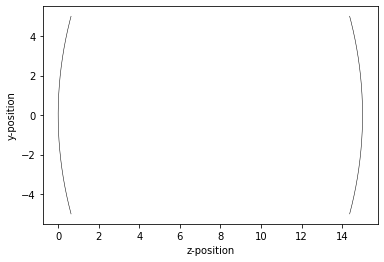

In [20]:
fig,ax=plt.subplots()
asf.render(ax)
bsf.render(ax)
plt.show()

### Дефинираме на няколко на брой лъча
Задаване на началните условия на лъчите

In [23]:
ray_number=10
y_start = np.linspace(-lens_aperture_radius*0.9, lens_aperture_radius*0.9,
                      num=ray_number)
x_start = np.ones_like(y_start) * (-2.0)
theta = np.zeros_like(y_start)
rays = []

### Пресмятане на тангенциалния и нормалния вектор на лъчите

(-5.0, 5.0)

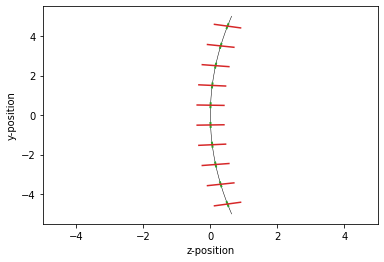

In [24]:
fig,ax=plt.subplots()
asf.render(ax)
tangent_vec_length=2.0
y_pos_array = np.linspace(-lens_aperture_radius*0.9, lens_aperture_radius*0.9,
                      num=ray_number)
for yp in y_pos_array:
    # get tangent vector
    t_v=asf.get_tangent_vec(yp,normalize=True)
    t_v=t_v*0.1
    n_v=asf.get_norm_vec(yp)
    n_v=n_v*0.4
    zp=asf.get_surface_zr(yp)
    
    # plot tangent vectors
    ax.plot([zp-t_v[0],zp+t_v[0]],[yp-t_v[1],yp+t_v[1]],color="C2",linewidth=2.0)
    
    # plot normal vectors
    ax.plot([zp-n_v[0],zp+n_v[0]],[yp-n_v[1],yp+n_v[1]],color="C3")

ax.set_xlim(left=-5,right=5)

### Дефинираме на няколко на брой лъча
Задаване на началните условия на лъчите

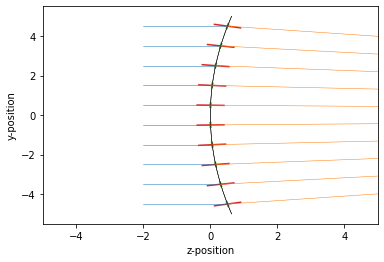

In [25]:
asf.render(ax)
for i in range(y_start.shape[0]):
    ray_wavelength=500
    ray = Ray(x_start[i], y_start[i], theta[i], ray_wavelength)
    rays.append(ray)

    asf.intersect(ray, t_min=0, t_max=5, prev_n=None)
    ray.render_all(ax,time_of_flights=50)
fig

Приближаваме, за да се види по-добре, как лъча се пречупва

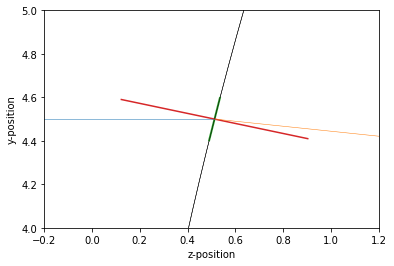

In [26]:
ax.set_xlim([-0.2,1.2])
ax.set_ylim([4,5])
fig

### Проследяване на лъчи от две повърхнини

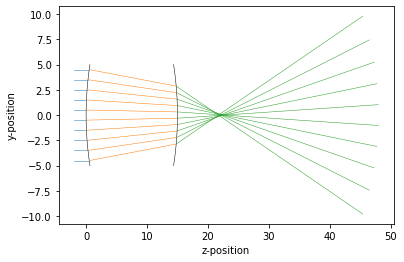

In [27]:
fig,ax=plt.subplots()
asf.render(ax)
bsf.render(ax)
for i in range(y_start.shape[0]):
    ray_wavelength=500
    ray = Ray(x_start[i], y_start[i], theta[i], ray_wavelength)
    rays.append(ray)

    asf.intersect(ray, t_min=0, t_max=100, prev_n=None)
    bsf.intersect(ray, t_min=0, t_max=100, prev_n=asf.n_r)
    ray.render_all(ax,time_of_flights=50)
plt.show()